<img src="https://cekumagroup.cas.lehigh.edu/sites/cekumagroup.cas2.lehigh.edu/files/image10.jpg "/>

# About the dataset 

*Sales data collection of the retail outlet BigMark for thousands of products (1559) across its ten stores 
*in different cities have been collected. Certain attributes of each product and store have been defined. 
    
# Main aim
* Build a predictive model and find out the sales of each product at a particular store
* Use the designed model to inform BigMark management of the properties of the products and store  
with better performance

 
**Happy reading!**

* * *

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt 
from sklearn import model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
train_data = pd.read_csv('bigmart_train.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.shape

(8523, 12)

In [5]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
train_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [8]:
train_data['Outlet_Age']=2021-train_data['Outlet_Establishment_Year']
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [9]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,23.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,12.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,17.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,22.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,34.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,36.000000


In [11]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
train_data['Outlet_Size'].mode()[0]

'Medium'

In [13]:
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [14]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

<AxesSubplot:>

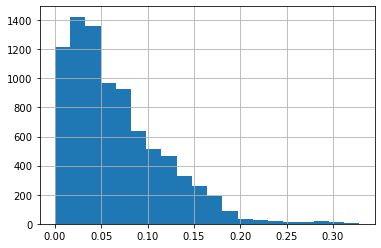

In [15]:
train_data['Item_Visibility'].hist(bins=20)

In [16]:
# Detect outliers
Q1 = train_data['Item_Visibility'].quantile(0.25)
Q3 = train_data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
# Remove outliers
filt_train_data = train_data.query('(@Q1 - 1.5* @IQR) <=Item_Visibility <= (@Q3 +1.5* @IQR)')

In [17]:
filt_train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [18]:
filt_train_data.shape, train_data.shape

((8379, 13), (8523, 13))

In [19]:
train_data = filt_train_data
train_data.shape

(8379, 13)

In [20]:
train_data['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [21]:
# Modify the visibility by converting the numerical data into categorical data
train_data['Item_Visibility_bins'] = pd.cut(train_data['Item_Visibility'],[0.000,0.065,0.13,0.20],
                                            labels=['Low Viz', 'Viz', 'High Viz'])

In [22]:
train_data['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [23]:
# Replace null values with low visibility
train_data['Item_Visibility_bins'] = train_data['Item_Visibility_bins'].replace(np.nan, 'Low Viz',regex=True)

In [24]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['Low fat','LF'],'Low Fat')

In [25]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')

In [26]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,NaN


In [27]:
#le = LabelEncoder()

In [28]:
#train_data['Item_Fat_Content'].unique()

In [29]:
#train_data['Item_Fat_Content'] = le.fit_transform(train_data['Item_Fat_Content'])

In [30]:
#train_data['Item_Visibility_bins'] = le.fit_transform(train_data['Item_Visibility_bins'])

In [31]:
#train_data['Outlet_Size'] = le.fit_transform(train_data['Outlet_Size'])

In [32]:
#train_data['Outlet_Location_Type'] = le.fit_transform(train_data['Outlet_Location_Type'])

In [33]:
for c in ['Item_Fat_Content', 'Item_Visibility_bins', 'Outlet_Size', 'Outlet_Location_Type']:
    print(f"Label Encoding: {c} - {train_data[c].nunique()}")
    le = LabelEncoder()
    train_data[c] = le.fit_transform(train_data[c])

Label Encoding: Item_Fat_Content - 3
Label Encoding: Item_Visibility_bins - 3
Label Encoding: Outlet_Size - 3
Label Encoding: Outlet_Location_Type - 3


In [34]:
dummy = pd.get_dummies(train_data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [35]:
train_data = pd.concat([train_data,dummy],axis=1)

In [36]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [37]:
# Drop irrelevant variables
train_data = train_data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type', 
                             'Outlet_Establishment_Year'],axis=1)

In [38]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [39]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,22,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,12,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,22,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,23,3,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,34,3,0,1,0,0


In [40]:
X = train_data.drop('Item_Outlet_Sales',axis=1)
y = train_data.Item_Outlet_Sales

In [41]:
test_data = pd.read_csv('bigmart_test.csv')
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna('Medium')

In [42]:
# Relabel for easy identification
test_data['Item_Visibility_bins'] = pd.cut(test_data['Item_Visibility'],[0.000,0.065,0.13,0.20],
                                            labels=['Low Viz', 'Viz', 'High Viz'])

In [43]:
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [44]:
test_data['Item_Visibility_bins'] = test_data['Item_Visibility_bins'].fillna('Low Viz')

In [45]:
test_data['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [46]:
# Replace null values with low visibility
test_data['Item_Visibility_bins'] = test_data['Item_Visibility_bins'].replace(np.nan, 'Low Viz',regex=True)

In [47]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['Low fat','LF'],'Low Fat')

In [48]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('reg', 'Regular')

In [49]:
test_data['Item_Fat_Content'] = le.fit_transform(test_data['Item_Fat_Content'])

In [50]:
test_data['Item_Visibility_bins'] = le.fit_transform(test_data['Item_Visibility_bins'])

In [51]:
test_data['Outlet_Size'] = le.fit_transform(test_data['Outlet_Size'])

In [52]:
test_data['Outlet_Location_Type'] = le.fit_transform(test_data['Outlet_Location_Type'])

In [53]:
test_data['Outlet_Age'] = le.fit_transform(test_data['Outlet_Establishment_Year'])

In [54]:
dummy = pd.get_dummies(test_data['Outlet_Type'])
test_data = pd.concat([test_data,dummy],axis=1)

In [55]:
X_test = test_data.drop(['Item_Identifier','Item_Type','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [56]:
X.columns,X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Visibility_bins', 'Outlet_Age', 'Grocery Store',
        'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [57]:
# Train the data using SKlearn

In [58]:
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.30,random_state=42)

In [59]:
lin = LinearRegression()

In [60]:
lin.fit(Xtrain,ytrain)
print(lin.coef_)
lin.intercept_

[    3.35662016    25.60838646  -103.62415364    15.96855715
    16.78809725     7.94373052    -2.29584866    23.21038545
 -1754.50307086   219.60428213  -122.61674151  1657.51553023]


-202.71761781931582

In [61]:
predictions = lin.predict(Xtest)
print(sqrt(mean_squared_error(ytest,predictions)))

1118.48645487984


In [ ]:
# Use Ridge statistics

In [62]:
ridgereg = Ridge(alpha=0.001,normalize=True)
ridgereg.fit(Xtrain,ytrain)
print(sqrt(mean_squared_error(ytrain,ridgereg.predict(Xtrain))))
print(sqrt(mean_squared_error(ytest,ridgereg.predict(Xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgereg.score(Xtest,ytest)))

1139.452862059927
1118.4290612607788
R2 Value/Coefficient of Determination: 0.5486035026497414


In [63]:
# Use Lasso statistics

In [64]:
lassoreg = Lasso(alpha=0.001,normalize=True)

In [65]:
lassoreg.fit(Xtrain,ytrain)

Lasso(alpha=0.001, normalize=True)

In [66]:
print(sqrt(mean_squared_error(ytrain,lassoreg.predict(Xtrain))))
print(sqrt(mean_squared_error(ytest,lassoreg.predict(Xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(Xtest,ytest)))



1139.4522016188898
1118.4800243829707
R2 Value/Coefficient of Determination: 0.5485623644143904


In [67]:
# Use ElasticNet statistics

In [68]:
Elas = ElasticNet(alpha=0.001,normalize=True)
Elas.fit(Xtrain,ytrain)

ElasticNet(alpha=0.001, normalize=True)

In [69]:
print(sqrt(mean_squared_error(ytrain,Elas.predict(Xtrain))))
print(sqrt(mean_squared_error(ytest,Elas.predict(Xtest))))
print(mean_absolute_error(ytest,Elas.predict(Xtest)))

print('R2 Value/Coefficient of Determination: {}'.format(Elas.score(Xtest,ytest)))



1478.233544231986
1429.134566099306
1122.1501565751887
R2 Value/Coefficient of Determination: 0.262965961580065


### Inference from the various analysis
* ElasticNet has the worst performance in describing the data